In [1]:
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np
import random
import math
from tqdm import tqdm

Функция генерации выборки с первой практики

In [2]:
def generate_n_random_numbers(N: int, distribution: str):
    """
    N - size of sample
    distribution - ["Uniform[0, 1]", "Uniform[-1, 1]", "2xUniform[-1, 1]", "3xUniform[-1, 1]", "Cauchy(0, 1)", Norm(0, 1)]
    """
    match distribution:
        case "Uniform[0, 1]":
            return [random.uniform(0, 1) for _ in range(N)]
        case "Uniform[-1, 1]":
            return [random.uniform(0, 1) * 2 - 1 for _ in range(N)]
        case "2xUniform[-1, 1]":
            t = generate_n_random_numbers(2 * N, "Uniform[-1, 1]")
            return [t[2 * i] + t[2 * i + 1] for i in range(N)]
        case "3xUniform[-1, 1]":
            t = generate_n_random_numbers(3 * N, "Uniform[-1, 1]")
            return [t[3 * i] + t[3 * i + 1] + t[3 * i + 2] for i in range(N)]
        case "Cauchy(0, 1)":
            t = generate_n_random_numbers(N, "Uniform[0, 1]")
            return list(map(lambda x: math.tan(math.pi * (x - 0.5)), t))
        case "Norm(0, 1)":
            return [random.normalvariate(0, 1) for _ in range(N)]
        case _:
            return []

In [3]:
P = 0.95
PERCENTILE = ((1 - P) / 2) * 100
ANALYTICAL_EXPECTATION = 0
ITERATIONS = 10 ** 4
BOOTSTRAP_SIZE = 1000
NS = [10, 100, 1000]

Функция подсчёта доверительного интервала (1)

In [4]:
def calculate_c_star(x: list):
    return sum(x) / len(x)

In [5]:
def confidence_interval_1(sample: list, sigma_squared: float) -> tuple:
    quantil = sps.norm(loc=0, scale=1).ppf((1 + P) / 2)
    term = quantil * math.sqrt(sigma_squared) / math.sqrt(len(sample))
    c_star = calculate_c_star(sample)
    return (c_star - term, c_star + term)

Функция подсчёта доверительного интервала (2)

In [6]:
def calculate_sigma_star(x: list):
    c_star = calculate_c_star(x)
    return math.sqrt(sum([pow(xi - c_star, 2) for xi in x]) / (len(x) - 1))

In [7]:
def confidence_interval_2(sample: list) -> tuple:
    n = len(sample)
    c_star = calculate_c_star(sample)
    term = sps.t.ppf((1 + P) / 2, n - 1) * calculate_sigma_star(sample) / math.sqrt(n) 
    return (c_star - term, c_star + term)

Функция подсчёта доверительного интервала (3)

In [8]:
def calculate_D_coef(n: int, p: float) -> float:
    return math.sqrt(-(math.log((1 - p) / 2) / (2 * n))) - (1 / (6 * n))

In [9]:
def confidence_interval_3(sample: list) -> tuple:
    n = len(sample)
    a, b = min(sample), max(sample)
    c_star = calculate_c_star(sample)
    term = (b - a) * calculate_D_coef(n, P)
    return (c_star - term, c_star + term)

Сгенерируем по $10^4$ выборок разных размеров для каждого распределения и проверим, какая доля из них будет попадать в доверительный интервал, подсчитанный каждым из трёх методов

In [10]:
distros = ["Uniform[-1, 1]", "Norm(0, 1)", "2xUniform[-1, 1]"]
sigma_squared = {"Uniform[-1, 1]": 1 / 3,
                    "Norm(0, 1)": 1,
                    "2xUniform[-1, 1]": 2 / 3}

In [11]:
print("Start generating samples...")
samples = {d: [[generate_n_random_numbers(n, d) for _ in range(ITERATIONS)]
                for n in NS] for d in tqdm(distros)}
print("Samples generated.")

Start generating samples...


  0%|          | 0/3 [00:00<?, ?it/s]

100%|██████████| 3/3 [00:18<00:00,  6.32s/it]

Samples generated.


Distribution Uniform[-1, 1], samples size = 10


100%|██████████| 10000/10000 [00:07<00:00, 1267.37it/s]


Distribution Uniform[-1, 1], samples size = 100


100%|██████████| 10000/10000 [00:07<00:00, 1369.67it/s]


Distribution Uniform[-1, 1], samples size = 1000


100%|██████████| 10000/10000 [00:09<00:00, 1004.08it/s]


Results for distribution Uniform[-1, 1]
[0.9526, 0.9497, 0.9486] (1)
[0.9453, 0.9513, 0.9479] (2)
[0.9943, 1.0, 1.0] (3)
----------------------------------------
Distribution Norm(0, 1), samples size = 10


100%|██████████| 10000/10000 [00:07<00:00, 1379.57it/s]


Distribution Norm(0, 1), samples size = 100


100%|██████████| 10000/10000 [00:07<00:00, 1285.28it/s]


Distribution Norm(0, 1), samples size = 1000


100%|██████████| 10000/10000 [00:09<00:00, 1083.85it/s]


Results for distribution Norm(0, 1)
[0.9473, 0.9527, 0.9471] (1)
[0.9472, 0.9514, 0.9486] (2)
[0.9974, 1.0, 1.0] (3)
----------------------------------------
Distribution 2xUniform[-1, 1], samples size = 10


100%|██████████| 10000/10000 [00:07<00:00, 1318.26it/s]


Distribution 2xUniform[-1, 1], samples size = 100


100%|██████████| 10000/10000 [00:07<00:00, 1275.12it/s]


Distribution 2xUniform[-1, 1], samples size = 1000


100%|██████████| 10000/10000 [00:09<00:00, 1076.67it/s]


Results for distribution 2xUniform[-1, 1]
[0.9492, 0.9496, 0.9491] (1)
[0.948, 0.9504, 0.9485] (2)
[0.9964, 1.0, 1.0] (3)
----------------------------------------


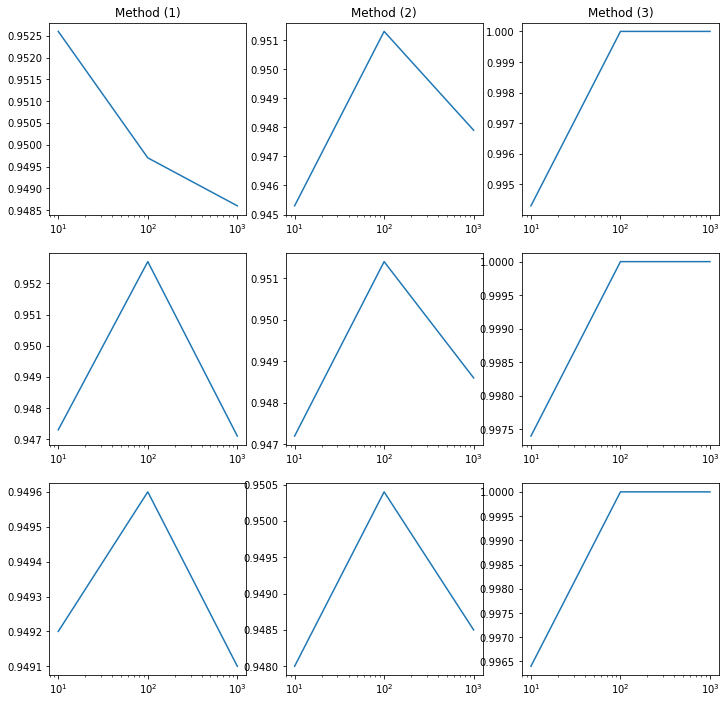

In [40]:
_, axis = plt.subplots(3, 3, figsize=(15, 12))
task_2_results_a = {d: {method: {} for method in range(3)} for d in distros}
task_2_results_b = {d: {method: {} for method in range(3)} for d in distros}
for i, d in enumerate(distros):
    results_1 = []
    results_2 = []
    results_3 = []
    for n_id, n in enumerate(NS):
        hits_counter_1 = 0
        hits_counter_2 = 0
        hits_counter_3 = 0
        print(f"Distribution {d}, samples size = {n}")
        average_d_left = [0] * 3
        average_d_right = [0] * 3
        for sample in tqdm(samples[d][n_id]):
            d_left_1, d_right_1 = confidence_interval_1(sample, sigma_squared[d])
            hits_counter_1 += d_left_1 <= ANALYTICAL_EXPECTATION <= d_right_1
            average_d_left[0] += d_left_1
            average_d_right[0] += d_right_1

            d_left_2, d_right_2 = confidence_interval_2(sample)
            hits_counter_2 += d_left_2 <= ANALYTICAL_EXPECTATION <= d_right_2
            average_d_left[1] += d_left_2
            average_d_right[1] += d_right_2

            d_left_3, d_right_3 = confidence_interval_3(sample)
            hits_counter_3 += d_left_3 <= ANALYTICAL_EXPECTATION <= d_right_3
            average_d_left[2] += d_left_3
            average_d_right[2] += d_right_3

        results_1.append(hits_counter_1 / ITERATIONS)
        results_2.append(hits_counter_2 / ITERATIONS)
        results_3.append(hits_counter_3 / ITERATIONS)

        average_d_left = np.array(average_d_left) / len(samples[d][n_id])
        average_d_right = np.array(average_d_right) / len(samples[d][n_id])

        for method in range(3):
            task_2_results_a[d][method][n] = average_d_left[method]
            task_2_results_b[d][method][n] = average_d_right[method]

    print(f"Results for distribution {d}\n"
            f"{results_1} (1)\n"
            f"{results_2} (2)\n"
            f"{results_3} (3)\n", '-' * 40, sep='')
    axis[i][0].plot(NS, results_1)
    axis[i][1].plot(NS, results_2)
    axis[i][2].plot(NS, results_3)
    axis[i][0].set_xscale('log')
    axis[i][1].set_xscale('log')
    axis[i][2].set_xscale('log')

axis[0][0].title.set_text("Method (1)")
axis[0][1].title.set_text("Method (2)")
axis[0][2].title.set_text("Method (3)")
plt.show()

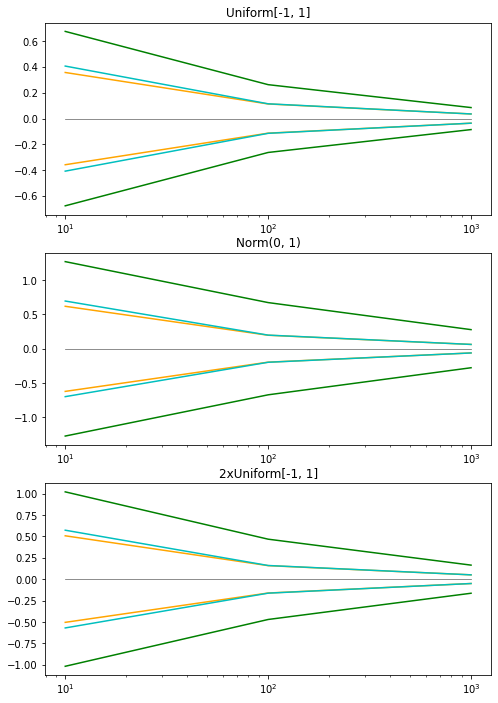

In [48]:
figure, axis = plt.subplots(3, 1, figsize=(8, 12))
method_colors = {0: "orange", 1: "c", 2: "green"}
for id, d in enumerate(distros):
    for method in range(3):
        axis[id].plot(NS, task_2_results_a[d][method].values(), color=method_colors[method])
        axis[id].plot(NS, task_2_results_b[d][method].values(), color=method_colors[method])
        axis[id].set_xscale('log')
        axis[id].plot(NS, [0] * len(NS), color='gray', linewidth=0.5)
        axis[id].title.set_text(d)

На графиках изображена доля испытаний, в которых доверительный интервал накрывает реальное матожидание 0. По строкам идут распределения (сверху вниз: $\text{Uniform}[-1, 1]$, $\text{Norm}(0, 1)$ и $2\cdot \text{Uniform}[-1, 1]$), по столбцам идут методы (слева направо: классический, бутстрэп и джекнайф). На каждом графике отображена доля по оси ординат, и размер выборки $n$ по оси абсцисс. Для каждой точки проведено $10^4$ испытаний.